In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Load the dataset using the 'ISO-8859-1' encoding
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Set the style for seaborn plots
sns.set_style('whitegrid')

# Check for the missing values
missing_values = spotify_data.isnull().sum()

# Descriptive statistics
desc_stats = spotify_data.describe()

print('These are the number of missing values in each column:\n', missing_values)
print('These are the statistic values of each column:\n',desc_stats)

These are the number of missing values in each column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
These are the statistic values of each column:
        artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116

In [4]:
# Check the datatype of the 'streams' column
streams_datatype = spotify_data['streams'].dtype

print('The data type of \'streams\' column is:', streams_datatype)

The data type of 'streams' column is: object


In [5]:
# Convert the 'streams' column to numeric type
spotify_data['streams'] =  pd.to_numeric(spotify_data['streams'], errors = 'coerce')

# Checking for any NaN values in the 'streams' column after conversion
nan_streams = spotify_data['streams'].isnull().sum()

print('There are', nan_streams, 'Nan data points in \'streams\' column')

There are 1 Nan data points in 'streams' column


In [6]:
# Extracting the row with the NaN value in the 'streams' column
nan_streams_row = spotify_data[spotify_data['streams'].isnull()]

nan_streams_row

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


In [7]:
# Clear any duplicate rows in the dataset
spotify_data = spotify_data.drop_duplicates()

#  Clear any the rows that have a NaN value in the 'streams' column
spotify_data = spotify_data.dropna(subset = ['streams'])

# Checking the shape of the dataframe after dropping the row
data_shape = spotify_data.shape

print('This is the data shape after dropping the NaN:', data_shape)

This is the data shape after dropping the NaN: (952, 24)


In [8]:
# Correlation with 'streams' column after dropping the NaN row
corr_w_streams = spotify_data.corr()['streams'].sort_values(ascending = False)

print('These are the correlations of the columns in the table with \'stream\' column:\n', corr_w_streams)

These are the correlations of the columns in the table with 'stream' column:
 streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: streams, dtype: float64


/var/folders/hd/350rl6f57c3g5gwpl3_84tn00000gn/T/ipykernel_30846/288435928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_w_streams = spotify_data.corr()['streams'].sort_values(ascending = False)


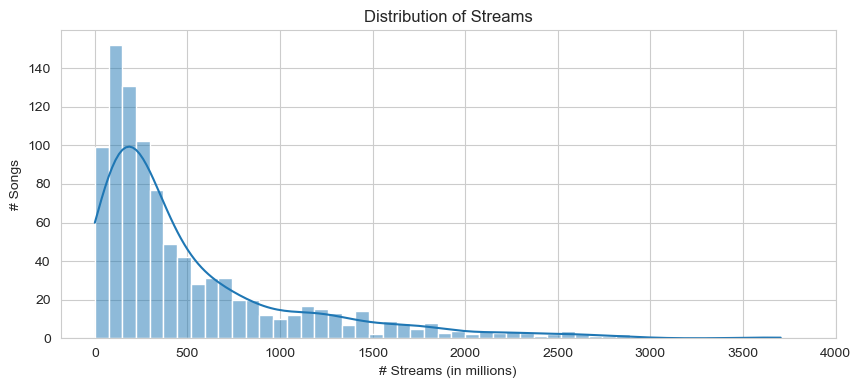

In [16]:
# Plotting the distribution of the 'streams' variable
plt.figure(figsize = (10, 4))
sns.histplot(spotify_data['streams'], bins = 50, kde = True)
tick_loc = [0, 0.5e9, 1.0e9, 1.5e9, 2.0e9, 2.5e9, 3.0e9, 3.5e9, 4.0e9]
tick_label = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000']
plt.xticks(tick_loc, tick_label)
plt.title('Distribution of Streams')
plt.xlabel('# Streams (in millions)')
plt.ylabel('# Songs')
plt.show()

In [10]:
# List of all the features
features_list = list(spotify_data.columns)

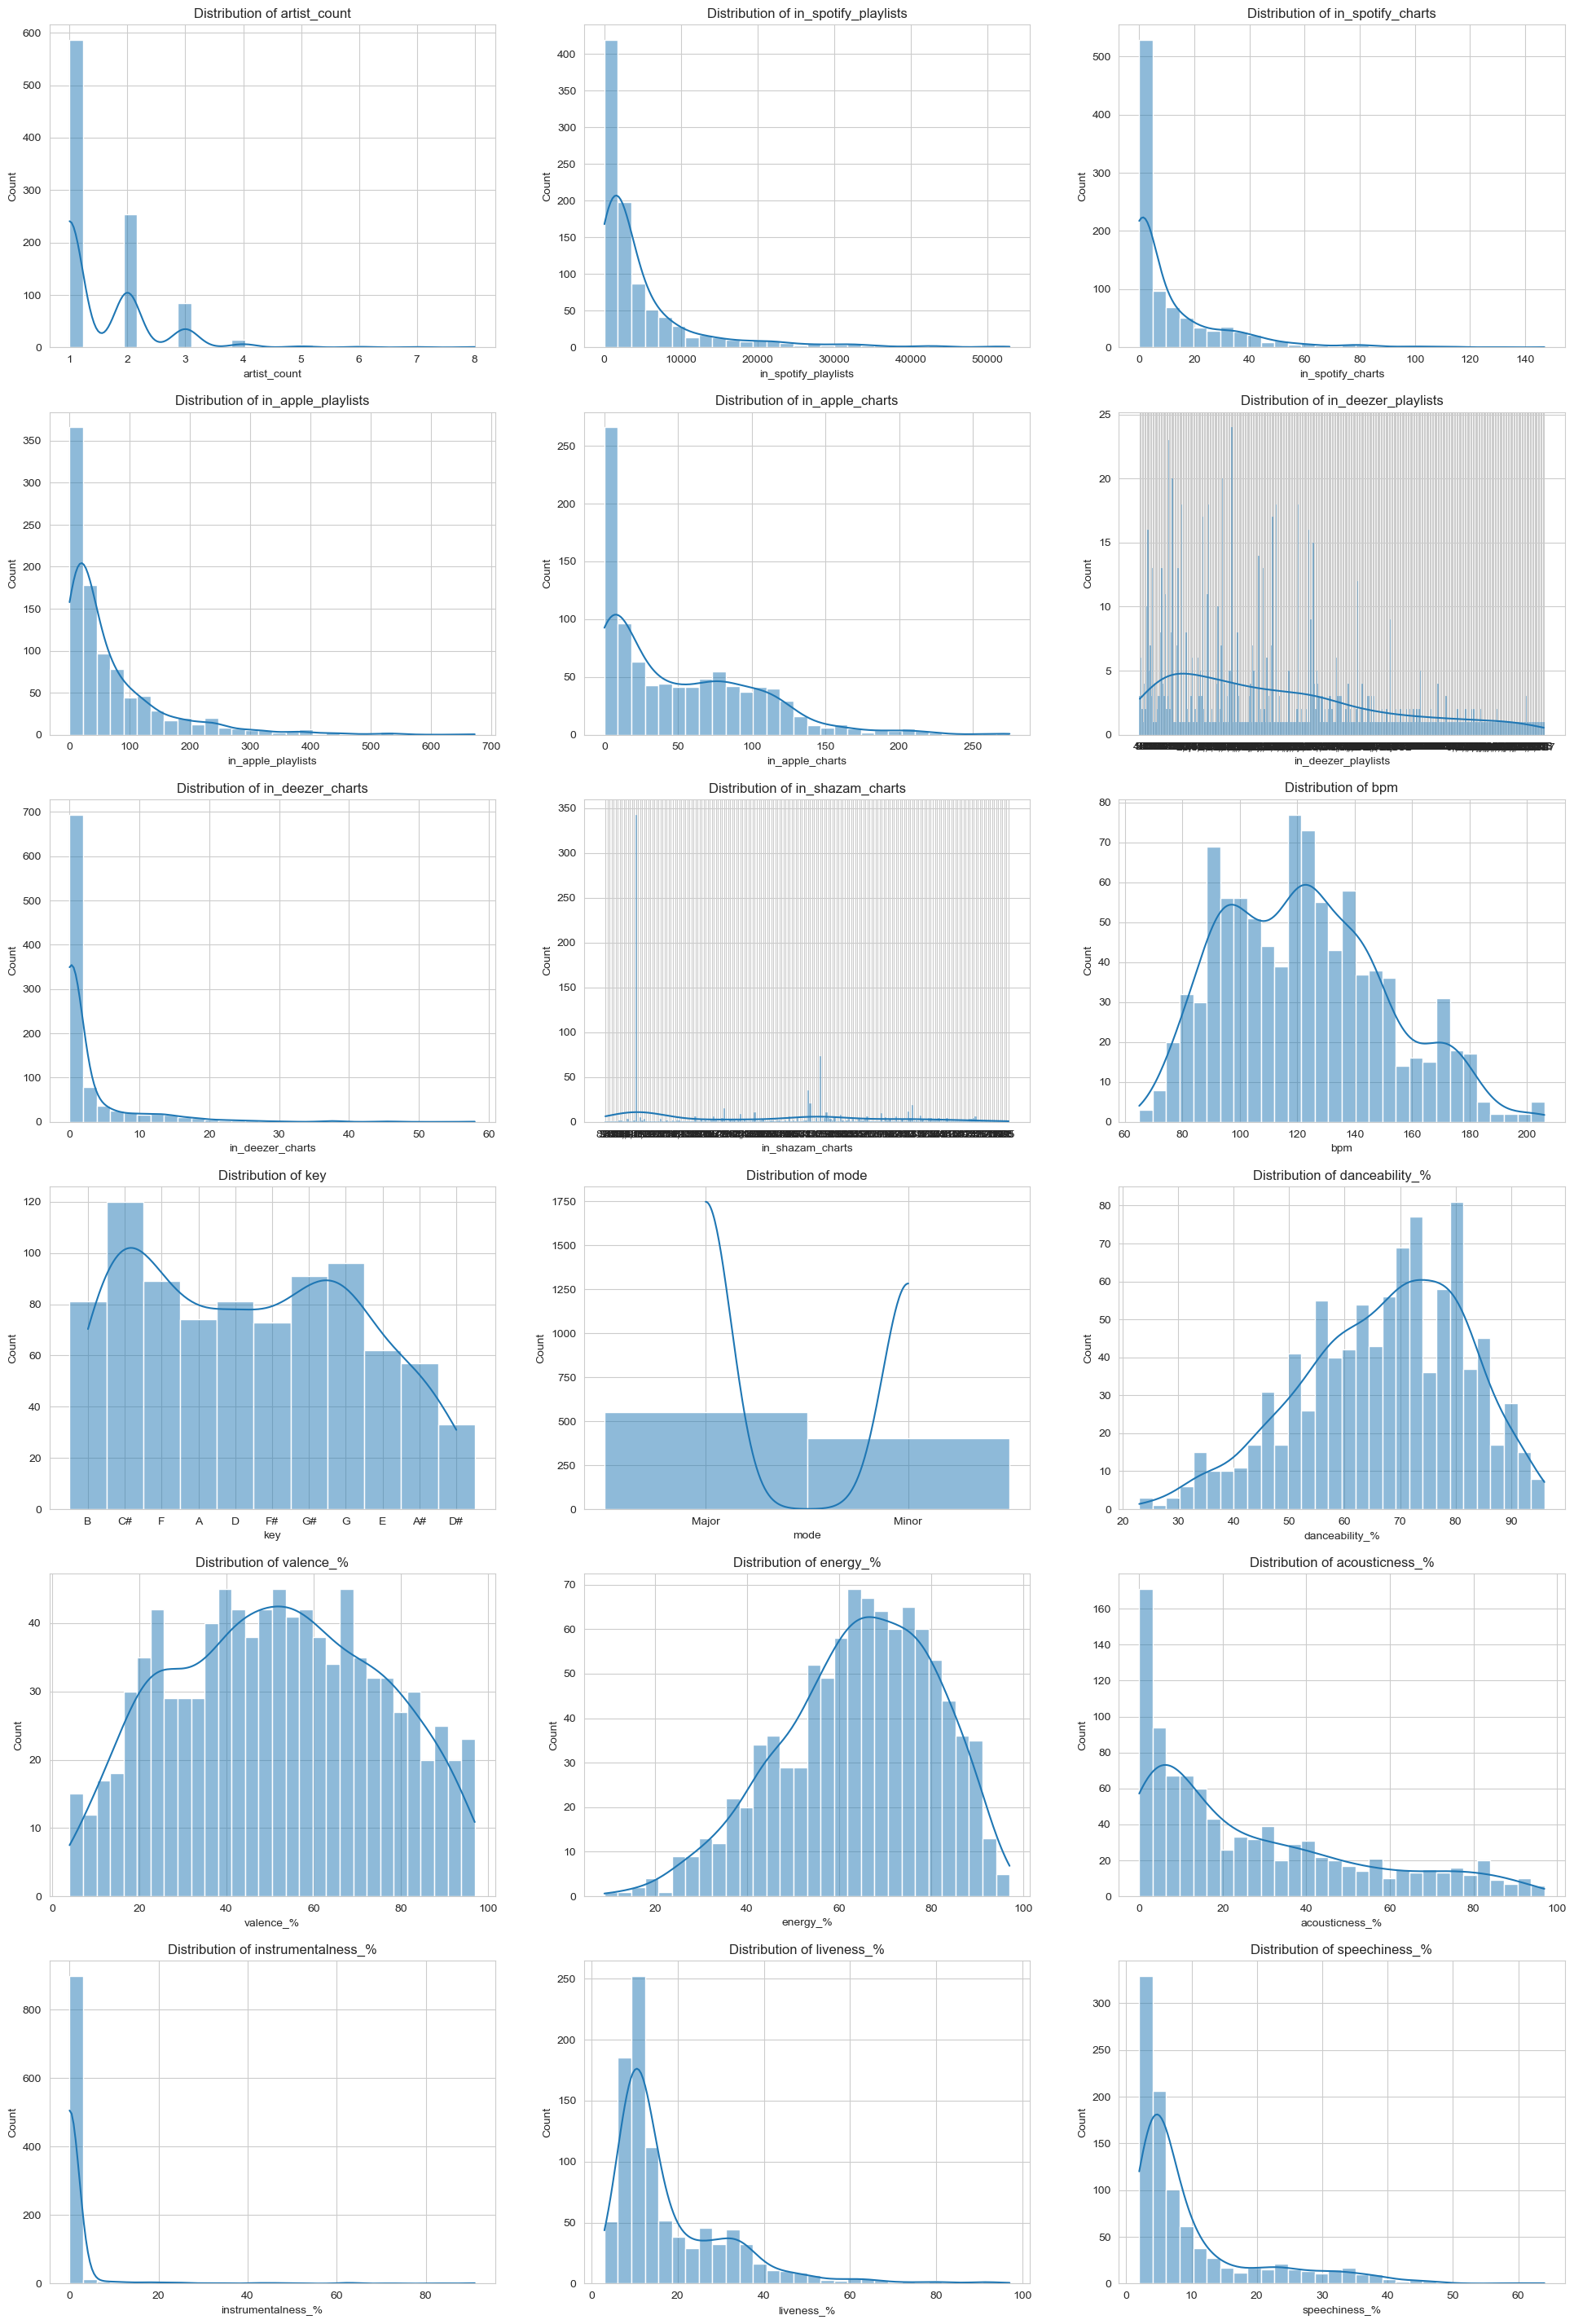

In [11]:
# List of key numerical features for Distribution analysis
exclude_non_num = [0, 1, 3, 4, 5, 8]
numerical_features = [features_list[i] for i in range(len(features_list)) if i not in exclude_non_num]

# Plotting the distribution of key numerical features
plt.figure(figsize = (24, 36))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(spotify_data[feature], bins = 30, kde = True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout

plt.show()

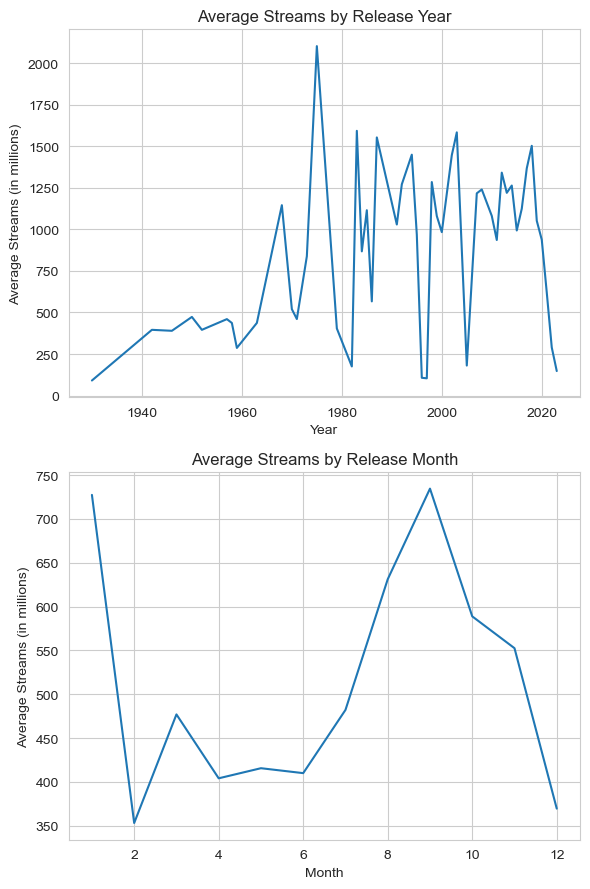

In [20]:
# Plotting the distribution of key temporal features
plt.figure(figsize = (6, 9))

# Streams by release year
plt.subplot(2, 1, 1)
yearly_streams = spotify_data.groupby('released_year')['streams'].mean()
sns.lineplot(x = yearly_streams.index, y = yearly_streams.values)
tick_loc = [0, 0.25e9, 0.5e9, 0.75e9, 1.0e9, 1.25e9, 1.5e9, 1.75e9, 2.0e9]
tick_label = ['0', '250', '500', '750', '1000', '1250', '1500', '1750', '2000']
plt.yticks(tick_loc, tick_label)
plt.title('Average Streams by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Streams (in millions)')

# Streams by release month
plt.subplot(2, 1, 2)
monthly_streams = spotify_data.groupby('released_month')['streams'].mean()
sns.lineplot(x = monthly_streams.index, y = monthly_streams.values)
tick_loc = [3.5e8, 4.0e8, 4.5e8, 5.0e8, 5.5e8, 6.0e8, 6.5e8, 7.0e8, 7.5e8]
tick_label = ['350', '400', '450', '500', '550', '600', '650', '700', '750']
plt.yticks(tick_loc, tick_label)
plt.title('Average Streams by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Streams (in millions)')

plt.tight_layout()
plt.show()